In [1]:
import os 
import os.path as osp 
import glob 
import json
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

import matplotlib.pyplot as plt
%matplotlib inline

WORKING_DIR = '/home/ntphat/projects/medico/medico'
os.chdir(WORKING_DIR)

DATA_DIR = 'data'
BBOX_JSON = osp.join(DATA_DIR, 'kavsir_bboxes.json')
bbox_js = json.load(open(BBOX_JSON))

In [2]:
sample_img = list(bbox_js.keys())[0]
print(bbox_js[sample_img])

{'height': 529, 'width': 622, 'bbox': [{'label': 'polyp', 'xmin': 38, 'ymin': 5, 'xmax': 430, 'ymax': 338}]}


In [3]:
data = {
    'image': [],
    'nbox': [],
    'height': [],
    'width': [],
    'box_detail': [],
}
for img_name in bbox_js.keys():
    data['image'].append(img_name)
    value = bbox_js[img_name]
    data['nbox'].append(len(value['bbox']))
    data['height'].append(value['height'])
    data['width'].append(value['width'])
    data['box_detail'].append(value['bbox'])

total_df = pd.DataFrame.from_dict(data)
total_df.head()

,image,nbox,height,width,box_detail
0,cju0qkwl35piu0993l0dewei2,1,529,622,"[{'label': 'polyp', 'xmin': 38, 'ymin': 5, 'xm..."
1,cju0qoxqj9q6s0835b43399p4,1,1070,1348,"[{'label': 'polyp', 'xmin': 194, 'ymin': 284, ..."
2,cju0qx73cjw570799j4n5cjze,1,529,619,"[{'label': 'polyp', 'xmin': 187, 'ymin': 14, '..."
3,cju0roawvklrq0799vmjorwfv,3,528,622,"[{'label': 'polyp', 'xmin': 486, 'ymin': 42, '..."
4,cju0rx1idathl0835detmsp84,1,528,617,"[{'label': 'polyp', 'xmin': 292, 'ymin': 154, ..."


# EDA

In [4]:
import seaborn as sns

total_df.nbox.value_counts()

1     945
2      47
3       6
10      1
4       1
Name: nbox, dtype: int64

In [5]:
total_df.to_csv(osp.join(DATA_DIR, 'bboxes.csv'), index=False)

/opt/anaconda3/envs/ntp/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

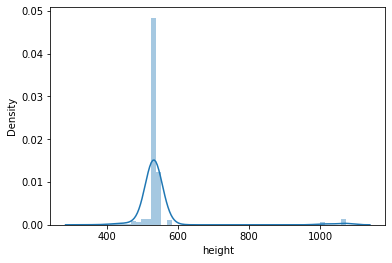

In [6]:
sns.distplot(total_df.height)

/opt/anaconda3/envs/ntp/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='width', ylabel='Density'>

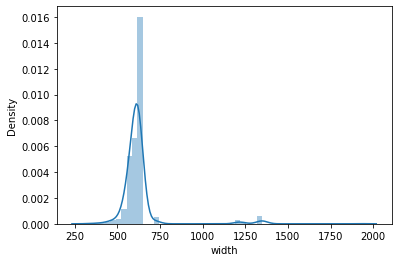

In [7]:
sns.distplot(total_df.width)

# Dataset 1: 
train: only 1 box

In [8]:
total_df= pd.read_csv(osp.join(DATA_DIR, 'bboxes.csv'))
val_size=.1
train_ids, val_ids = [], []

train_1_box, val_1_box = train_test_split(total_df[total_df.nbox==1].index, test_size=val_size)
train_ids.extend(train_1_box)
val_ids.extend(val_1_box)

# add all sample that have more than 1 box to val set
val_ids.extend(total_df[total_df.nbox!=1].index)

train_df = total_df.loc[train_ids]
val_df = total_df.loc[val_ids]

print(len(train_df))
print(len(val_df))

train_df.to_csv(osp.join(DATA_DIR, 'train.csv'), index=False)
val_df.to_csv(osp.join(DATA_DIR, 'val.csv'), index=False)

850
150


# Dataset 2:
train: 1 and 2 box

In [6]:
total_df= pd.read_csv(osp.join(DATA_DIR, 'bboxes.csv'))
val_size=.1
train_ids, val_ids = [], []

train_1_box, val_1_box = train_test_split(total_df[total_df.nbox==1].index, test_size=val_size)
train_2_box, val_2_box = train_test_split(total_df[total_df.nbox==2].index, test_size=val_size)

train_ids.extend(train_1_box)
train_ids.extend(train_2_box)

val_ids.extend(val_1_box)
val_ids.extend(val_2_box)


# add all sample that have more than 1 box to val set
val_ids.extend(total_df[total_df.nbox > 2].index)


train_df = total_df.loc[train_ids]
val_df = total_df.loc[val_ids]

print(len(train_df))
print(len(val_df))

train_df.to_csv(osp.join(DATA_DIR, 'train2.csv'), index=False)
val_df.to_csv(osp.join(DATA_DIR, 'val2.csv'), index=False)

892
108


# Dataset 3
Train test split with test_size = 0.8

In [6]:
total_df= pd.read_csv(osp.join(DATA_DIR, 'bboxes.csv'))
val_size= 0.2
train_ids, val_ids = train_test_split(total_df.index, test_size=val_size)

train_df = total_df.loc[train_ids]
val_df = total_df.loc[val_ids]

print(len(train_df))
print(len(val_df))

train_df.to_csv(osp.join(DATA_DIR, 'train3.csv'), index=False)
val_df.to_csv(osp.join(DATA_DIR, 'val3.csv'), index=False)

800
200


# Dataset 4

Mr. Cong's split

random_state=2020

In [4]:
total_df= pd.read_csv(osp.join(DATA_DIR, 'bboxes.csv'))
val_size= 0.2
train_ids, val_ids = train_test_split(total_df.index, test_size=val_size, random_state=2020)

train_df = total_df.loc[train_ids]
val_df = total_df.loc[val_ids]

print(len(train_df))
print(len(val_df))

train_df.to_csv(osp.join(DATA_DIR, 'train4.csv'), index=False)
val_df.to_csv(osp.join(DATA_DIR, 'val4.csv'), index=False)

800
200


# DATASET 5:
k-fold with test_size = 0.1 --> to ensemble for final result


In [15]:
splits = 10 # because we use 10% of train data to test
skf = StratifiedKFold(n_splits=splits)
save_dir = osp.join(DATA_DIR, f'KFold_{splits}')
os.makedirs(save_dir, exist_ok=True)
X, y = total_df, total_df['nbox']
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = total_df.loc[train_idx].reset_index(drop=True), total_df.loc[test_idx].reset_index(drop=True)
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]    
    
    X_train.to_csv(osp.join(save_dir, f"train_{i+1}.csv"), index=False)
    X_test.to_csv(osp.join(save_dir, f"val_{i+1}.csv"), index=False)    

/opt/anaconda3/envs/ntp/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
